# Machine Learning Modeling for Predicting Indoor Locations

### Import Libraries 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Apply k-fold cross-validation with grid search
from sklearn.model_selection import GridSearchCV

In [4]:
classifier = RandomForestClassifier(random_state = 0)

### Import Data
- Training Data 
- Testing Data (Validation Data)

In [ ]:
training_set = pd.read_csv(".waseem/trainingData.csv")
testing_set = pd.read_csv(".waseem/ValidationData.csv")

### Expolartoy Data Analysis and Statistical Data Analysis 

### Training Data Analysis

#### Check the shape (size of Data)

In [24]:
training_set.shape # 19937 is number of records and 529 number of features

(19937, 529)

#### Check the basic info of data

In [25]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


#### Check Data types of data columns

In [26]:
training_set.dtypes

WAP001              int64
WAP002              int64
WAP003              int64
WAP004              int64
WAP005              int64
                    ...  
SPACEID             int64
RELATIVEPOSITION    int64
USERID              int64
PHONEID             int64
TIMESTAMP           int64
Length: 529, dtype: object

#### Check the columns of data 

In [ ]:
list(training_set.columns.values)

#### Check the statistical analysis of data

In [30]:
training_set.describe().T

,count,mean,std,min,25%,50%,75%,max
WAP001,19937.0,9.982364e+01,5.866842,-9.700000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
WAP002,19937.0,9.982094e+01,5.798156,-9.000000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
WAP003,19937.0,1.000000e+02,0.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
WAP004,19937.0,1.000000e+02,0.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
WAP005,19937.0,9.961373e+01,8.615657,-9.700000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
...,...,...,...,...,...,...,...,...
SPACEID,19937.0,1.484300e+02,58.342106,1.000000e+00,1.100000e+02,1.290000e+02,2.070000e+02,2.540000e+02
RELATIVEPOSITION,19937.0,1.833024e+00,0.372964,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
USERID,19937.0,9.068014e+00,4.988720,1.000000e+00,5.000000e+00,1.100000e+01,1.300000e+01,1.800000e+01
PHONEID,19937.0,1.302187e+01,5.362410,1.000000e+00,8.000000e+00,1.300000e+01,1.400000e+01,2.400000e+01


#### Check missing values

In [31]:
training_set.isnull() # No missing values (False means no missing and true means missing value)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Check any missing value present in data

In [32]:
training_set.isnull().sum().values.any()

False

## Evaluate Data

#### Check how many buildings 

In [148]:
list(training_set["BUILDINGID"].drop_duplicates()) # three buildings 

[1, 0, 2]

#### Check which biulding have, how many floor have

In [151]:
list(training_set.loc[training_set["BUILDINGID"] == 0]["FLOOR"].drop_duplicates()) # building 0 has 4 floors

[0, 2, 1, 3]

In [152]:
list(training_set.loc[training_set["BUILDINGID"] == 1]["FLOOR"].drop_duplicates()) # building 1 has 4 floors

[2, 0, 1, 3]

In [153]:
list(training_set.loc[training_set["BUILDINGID"] == 2]["FLOOR"].drop_duplicates()) # building 2 has 5 floors

[3, 2, 4, 1, 0]

##### Ignore all the unwanted things

In [158]:
import warnings
warnings.filterwarnings("ignore")

##### Display the distribution of longitude feature with respect to building feature

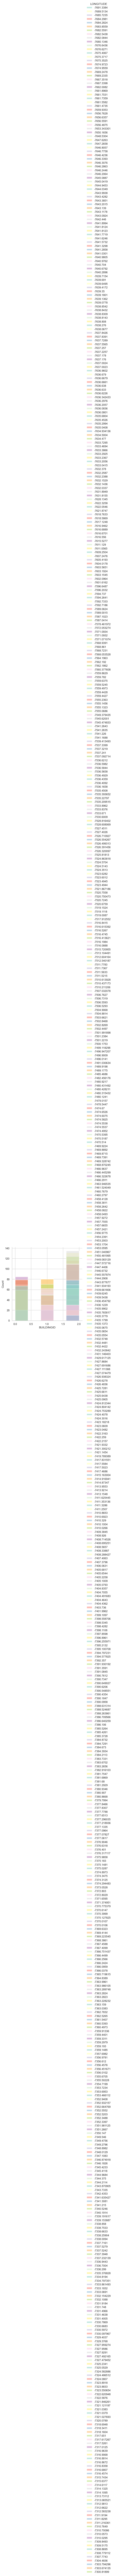

In [173]:
sns.displot(x =training_set["BUILDINGID"],kde=False,bins = 5 ,
hue = training_set['LONGITUDE'] , palette = 'Set3', data=training_set)

##### Display the distribution of longitude feature

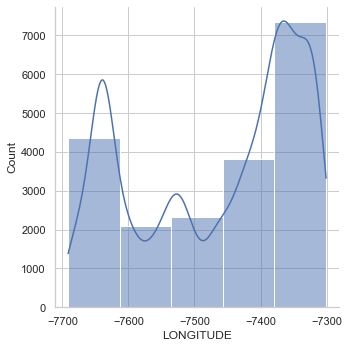

In [166]:
sns.displot(x = training_set["LONGITUDE"],kde=True,bins = 5 , data =training_set)

##### Display the distribution of latitude feature

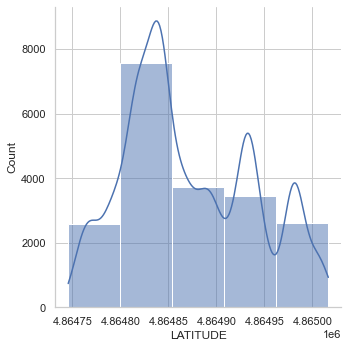

In [182]:
sns.displot(x = training_set["LATITUDE"],kde=True,bins = 5 , data =training_set)

##### Display the distribution of building feature

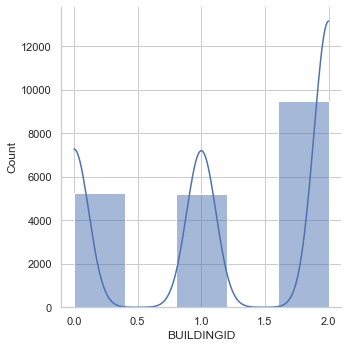

In [176]:
sns.displot(x = training_set["BUILDINGID"],kde=True,bins = 5 , data =training_set)

##### Display the distribution of floor feature

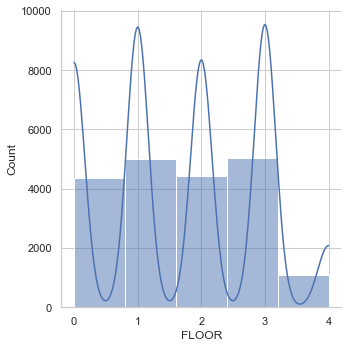

In [177]:
sns.displot(x = training_set["FLOOR"],kde=True,bins = 5 , data =training_set)

### Testing Data Analysis

##### Find the  unique buildings 

In [165]:
list(testing_set["BUILDINGID"].drop_duplicates()) 

[1, 2, 0]

##### Display the distribution of longitude feature with respect to building feature

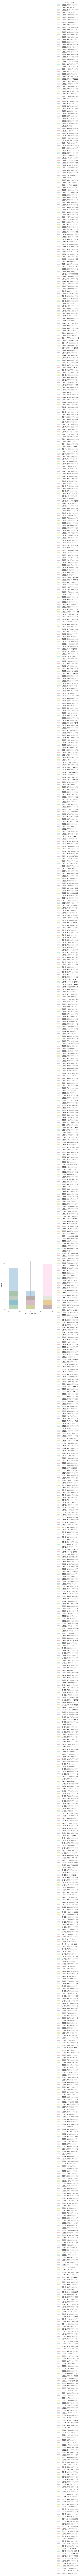

In [175]:
sns.displot(x =testing_set["BUILDINGID"],kde=False,bins = 5 ,
hue = testing_set['LONGITUDE'] , palette = 'Set3', data=testing_set)

##### Display the distribution of longitude feature

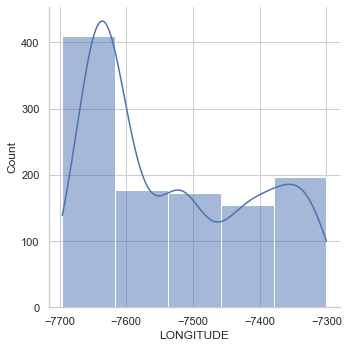

In [180]:
sns.displot(x = testing_set["LONGITUDE"],kde=True,bins = 5 , data =testing_set)

##### Display the distribution of latitude feature

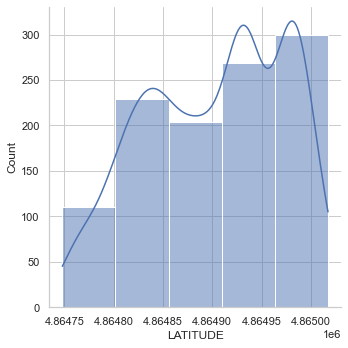

In [181]:
sns.displot(x = testing_set["LATITUDE"],kde=True,bins = 5 , data =testing_set)

##### Display the distribution of building feature

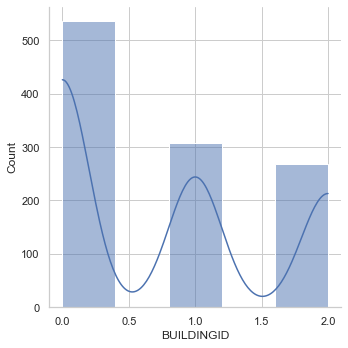

In [179]:
sns.displot(x = testing_set["BUILDINGID"],kde=True,bins = 5 , data =testing_set)

##### Display the distribution of floor feature

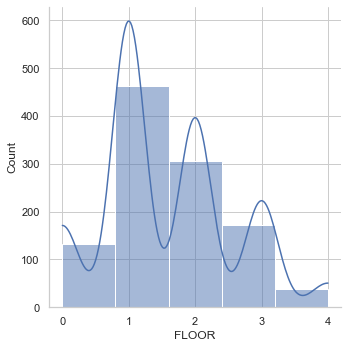

In [178]:
sns.displot(x = testing_set["FLOOR"],kde=True,bins = 5 , data =testing_set)

#### check for missing values

In [35]:
testing_set.isnull() # No missing values (False means no missing and true means missing value)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1107,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1108,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1109,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### Check missing data if any missing value

In [36]:
testing_set.isnull().sum().values.any()

False

# Preprocess Data and Feature Engineering

Fingerprint data representation

In [37]:
minimum_wap = training_set.iloc[:, 0:520].min().min() # minimum WAP is -104 dBm
minimum_wap

-104

In [38]:
maximum_wap = training_set.iloc[:, 0:520].max().max() # maximum WAP is 100 dBm
maximum_wap

100

##### Combine the trainig and testing data for transfromation of data

In [50]:
combined_data = pd.concat([training_set, testing_set])

Add the 105 to evry entry in the data if entry is less than and equal to zero (0) and minus the 100 if entry is grater than 0 to make positive value so that data does not impact the modeling.

In [51]:
combined_data.iloc[:, 0:520] = np.where(combined_data.iloc[:, 0:520] <= 0, combined_data.iloc[:, 0:520] + 105,
            combined_data.iloc[:, 0:520] - 100) 
combined_data.iloc[:, 0:520]

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
combined_data

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,0,0,0,0,0,0,0,0,0,0,...,0,-7541.264300,4.864921e+06,2,1,106,2,2,23,1371713733
1,0,0,0,0,0,0,0,0,0,0,...,0,-7536.621200,4.864934e+06,2,1,106,2,2,23,1371713691
2,0,0,0,0,0,0,0,8,0,0,...,0,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371714095
3,0,0,0,0,0,0,0,0,0,0,...,0,-7524.570400,4.864934e+06,2,1,102,2,2,23,1371713807
4,0,0,0,0,0,0,0,0,0,0,...,0,-7632.143600,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,0,0,0,0,0,0,0,0,0,...,0,-7317.344231,4.864796e+06,3,2,0,0,0,13,1381156711
1107,0,0,0,0,0,0,0,0,0,0,...,0,-7313.731120,4.864792e+06,3,2,0,0,0,13,1381156730
1108,0,0,0,0,0,0,0,0,0,0,...,0,-7637.535798,4.864903e+06,0,0,0,0,0,13,1381247781
1109,0,0,0,0,0,0,0,0,0,0,...,0,-7636.654005,4.864905e+06,0,0,0,0,0,13,1381247807


### There is  no need to center the data and normlize the data because of they are already on the same scale

Make a solitary mark for the model to anticipate. LONGITUDE, LATITUDE, FLOOR, and BUILDINGID pinpoints the specific area of a person inside a structure. Stack train set and test set first prior to allocating extraordinary area

In [54]:
combined_data = combined_data.assign(UNIQUELOCATION = (combined_data['LONGITUDE'].astype(str) + '_' + combined_data['LATITUDE'].astype(str) + '_' + combined_data['FLOOR'].astype(str) + '_' + combined_data['BUILDINGID'].astype(str)).astype('category').cat.codes)
combined_data.drop(['LATITUDE','LONGITUDE'], axis = 1)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,UNIQUELOCATION
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,106,2,2,23,1371713733,1162
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,106,2,2,23,1371713691,1137
2,0,0,0,0,0,0,0,8,0,0,...,0,0,2,1,103,2,2,23,1371714095,1044
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,102,2,2,23,1371713807,1076
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,122,2,11,13,1369909710,1456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,0,0,0,0,0,0,0,0,0,...,0,0,3,2,0,0,0,13,1381156711,98
1107,0,0,0,0,0,0,0,0,0,0,...,0,0,3,2,0,0,0,13,1381156730,50
1108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,1381247781,1589
1109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,1381247807,1550


##### Change the data type new column as category

In [57]:
# Change variable types
combined_data["UNIQUELOCATION"] = combined_data["UNIQUELOCATION"].astype("category")
combined_data.dtypes

WAP001                 int64
WAP002                 int64
WAP003                 int64
WAP004                 int64
WAP005                 int64
                      ...   
RELATIVEPOSITION       int64
USERID                 int64
PHONEID                int64
TIMESTAMP              int64
UNIQUELOCATION      category
Length: 530, dtype: object

##### Split of the training and testing dataset

In [58]:
training_set_PU = combined_data.iloc[0:19937, :]
testing_set_U = combined_data.iloc[19937:21048, :]

##### Input and output features of traininf data

In [59]:
X_train = training_set_PU.iloc[:, 0:520]
y_train = training_set_PU.iloc[:, 520:530]

##### Shape of training output data

In [60]:
y_train.shape

(19937, 10)

##### Shape of training input data

In [61]:
X_train.shape

(19937, 520)

##### Input and output features of testing data

In [63]:
X_test = testing_set_U.iloc[:, 0:520]
y_test = testing_set_U.iloc[:, 520:530]

##### Shape of testiing output data

In [64]:
y_test.shape

(1111, 10)

##### Shape of testiing input data

In [65]:
X_test.shape

(1111, 520)

Create a reference table for looking up the LONGITUDE, LATITUDE, FLOOR, and BUILDINGID associated with each UNIQUELOCATION value.

In [94]:
reference_table = pd.concat([y_train.iloc[:, [0,1,2,3,9]], y_test.iloc[:, [0,1,2,3,9]]])
reference_table

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,UNIQUELOCATION
0,-7541.264300,4.864921e+06,2,1,1162
1,-7536.621200,4.864934e+06,2,1,1137
2,-7519.152400,4.864950e+06,2,1,1044
3,-7524.570400,4.864934e+06,2,1,1076
4,-7632.143600,4.864982e+06,0,0,1456
...,...,...,...,...,...
1106,-7317.344231,4.864796e+06,3,2,98
1107,-7313.731120,4.864792e+06,3,2,50
1108,-7637.535798,4.864903e+06,0,0,1589
1109,-7636.654005,4.864905e+06,0,0,1550


##### Reference table after removel of duplicates 

In [95]:
reference_table = reference_table.drop_duplicates()
reference_table

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,UNIQUELOCATION
0,-7541.264300,4.864921e+06,2,1,1162
1,-7536.621200,4.864934e+06,2,1,1137
2,-7519.152400,4.864950e+06,2,1,1044
3,-7524.570400,4.864934e+06,2,1,1076
4,-7632.143600,4.864982e+06,0,0,1456
...,...,...,...,...,...
1106,-7317.344231,4.864796e+06,3,2,98
1107,-7313.731120,4.864792e+06,3,2,50
1108,-7637.535798,4.864903e+06,0,0,1589
1109,-7636.654005,4.864905e+06,0,0,1550


# Random Forest Modeling 

## Random Forest as default 

#### Import and build the random forest with default parameters

In [69]:
classifier = RandomForestClassifier()

##### Fit data into model for training 

In [70]:
classifier = classifier.fit(X_train, y_train.iloc[:, 9].squeeze())
classifier

RandomForestClassifier()

##### Training accuracy of the model

In [71]:
classifier.score(X_train, y_train.iloc[:, 9].squeeze())*100

96.82499874605006

##### Predictions on testing data

In [72]:
y_pred = classifier.predict(X_test)
y_pred

array([1049,  576,  411, ..., 1563, 1689, 1602], dtype=int64)

##### Testing accuracy 

In [73]:
classifier.score(X_test, y_pred)* 100

100.0

## Fine Tuning of RF model with GridSearch

Utilizing cross-validation, train best irregular woodland model to anticipate UNIQUELOCATION. We report the precision and kappa on UNIQUELOCATION expectations for cross-validation and on the preparation set.

'boundaries' can be a rundown of word references for greater explicitness in hyperparamter blends to endeavor.

the first setting cv = 10 will cause memory issues for nothing colab accounts, cv=2 confines the k-overlay cross approval to 2.

what best model depends on, and indicates that the best model will be refitted overall preparation set.

##### define parameters and fit to grid 

In [ ]:
hyper_parameters = {'criterion': ['gini',''], 'max_depth': [None], 'max_features': ['sqrt'],  }
scoring = {'accuracy': 'accuracy','kappa': make_scorer(cohen_kappa_score)}
    
grid = GridSearchCV(estimator = classifier,
                        param_grid = hyper_parameters,
                        scoring = scoring,
                        cv = 2, 
                        refit = 'accuracy', 
                        return_train_score = True,
                        n_jobs = -1) # parallel processing
grid_result_for_parameters= grid.fit(X_train, y_train.iloc[:, 9].squeeze()) 

##### Best estimeters of the model

In [76]:
grid_result_for_parameters.best_estimator_

RandomForestClassifier(max_features='sqrt')

##### Best score of the estimeters of the model

In [77]:
grid_result_for_parameters.best_score_

0.43040727619987934

##### Best parameters of the model

In [78]:
grid_result_for_parameters.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt'}

##### predictions on testing data 

In [79]:
y_predictions = grid_result_for_parameters.predict(X_test)
y_predictions

array([1049,  576,  495, ..., 1563, 1689, 1602], dtype=int64)

#### comparing the predicting parameters with referencing table

In [87]:
y_test_position = y_test.iloc[:, 0:2].values 
y_test_floor = y_test.iloc[:, 2].values
y_test_building = y_test.iloc[:, 3].values

##### unique value matching with reference table, build dict for it

In [98]:
dictionary_loc = {}
total = reference_table.shape[0]
for i in range(total):
    unique_key = int(reference_table.iloc[i]['UNIQUELOCATION'])
    reference_value = reference_table.iloc[i, 0:4].values
    dictionary_loc[unique_key] = reference_value

##### Match and compare the predicted and actual values with reference table

In [103]:
y_prediction_position = np.asarray([dictionary_loc[i] for i in y_predictions])[:, 0:2] 
y_prediction_floor = np.asarray([dictionary_loc[i] for i in y_predictions])[:, 2]
y_prediction_building = np.asarray([dictionary_loc[i] for i in y_predictions])[:, 3]

##### Position predictions

In [104]:
y_prediction_position

array([[  -7520.7245  , 4864892.438   ],
       [  -7394.577825, 4864836.925   ],
       [  -7381.7547  , 4864845.757   ],
       ...,
       [  -7636.9602  , 4864905.66    ],
       [  -7640.704   , 4864913.563   ],
       [  -7637.7289  , 4864903.183   ]])

##### Floor prediction

In [105]:
y_prediction_floor

array([2., 3., 4., ..., 0., 0., 0.])

##### Building predictions

In [106]:
y_prediction_building

array([1., 2., 2., ..., 0., 0., 0.])

#### function to find the distence between parameters 

set positions represented by numpy array of shape (m_train, 1)

In [107]:
def euclidean(y_test_pos, y_pred_pos):
    m_test = y_test_pos.shape[0]
    D_error = np.sum((y_test_pos - y_pred_pos)**2, axis = 1)**0.5
    return D_error

##### position errors for each test set example, in order as they appear

In [108]:
D_error = euclidean(y_test_pos, y_pred_pos)
D_error

array([ 5.55113254, 11.07442969,  7.49298627, ...,  2.49780098,
        9.5304749 ,  0.41334981])

##### Mean error of the testing data with predicting model result of position (Latitude and longitude)

In [109]:
mean_error = np.mean(D_error) # meters, this is the main performance metric for this task
mean_error

8.502296753326934

##### building hit rate predicted values to the actual values

In [110]:
building_hitrate = np.mean(y_test_building == y_prediction_building)
building_hitrate

0.9981998199819982

##### Floor hit rate predicted values to the actual values

In [111]:
floor_hitrate = np.mean(y_test_floor == y_prediction_floor)
floor_hitrate

0.9072907290729073

## Import and build the Random forest model with best parameters 

From sklearn.ensemble import RandomForestClassifier

In [3]:
classifier1 = RandomForestClassifier(max_features = "sqrt",max_depth = None, criterion = "gini")

#### Fit the model to training data 

In [113]:
classifier1 = classifier1.fit(X_train, y_train.iloc[:, 9].squeeze())

#### Training model accuracy 

In [114]:
classifier1.score(X_train, y_train.iloc[:, 9].squeeze())*100

96.82499874605006

#### Predict the testing data with trained model 

In [115]:
y_pred2 = classifier1.predict(X_test)
y_pred2

array([1049,  576,  373, ..., 1563, 1602, 1602], dtype=int64)

#### Testig Accuracy of the model 

In [116]:
testing_score = classifier1.score(X_test, y_pred2)* 100
testing_score

100.0

# KNN Modeling

#### KNN with Default parameters

In [118]:
knn = KNeighborsClassifier()

##### Fit the data into model

In [119]:
knn_model = knn.fit(X_train, y_train.iloc[:, 9].squeeze())

##### Training accuracy of model

In [120]:
knn_model.score(X_train, y_train.iloc[:, 9].squeeze())*100

84.77203190048654

##### Predict the model on testing data

In [121]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array([  29,  528,  411, ..., 1602, 1602, 1602], dtype=int64)

##### Testing accuracy

In [122]:
testing_score = knn_model.score(X_test, y_pred_knn)* 100
testing_score 

100.0

### Fine Tuning of RF model with GridSearch

##### Import grid search and define the parameters of the model 

In [123]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 2))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options,leaf_size=list(range(1,2)))

##### Fit the paramters to the validation method (Grid Search)

In [124]:
grid2 = GridSearchCV(knn, param_grid, cv=2, scoring='accuracy')

##### Fit the training data in validation method

In [125]:
grid2.fit(X_train,  y_train.iloc[:, 9].squeeze())

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1], 'n_neighbors': [1],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

##### Best parameters of the model

In [126]:
grid2.best_params_

{'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}

##### Best score of the estimeters of the model

In [127]:
grid2.best_score_

0.4057295915894651

##### Best estimeters of the model

In [128]:
grid2.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=1)

##### Predict the testing data on trained model

In [129]:
#--- test set metrics ---#
y_pred_knn_grid = grid2.predict(X_test)
y_pred_knn_grid

array([1456,  528,  411, ..., 1602, 1602, 1602], dtype=int64)

##### Comparing the predicting parameters with referencing table

In [134]:
y_test_position2 = y_test.iloc[:, 0:2].values 
y_test_floor2 = y_test.iloc[:, 2].values
y_test_building2 = y_test.iloc[:, 3].values

##### unique value matching with reference table, build dict for it

In [135]:
dictionary_loc2 = {}
total = reference_table.shape[0]
for i in range(total):
    unique_key = int(reference_table.iloc[i]['UNIQUELOCATION'])
    value = reference_table.iloc[i, 0:4].values
    dictionary_loc2[unique_key] = value

##### Match and compare the predicted and actual values with reference table

In [136]:
y_pred_position2 = np.asarray([dictionary_loc2[i] for i in y_pred_knn_grid])[:, 0:2] 
y_pred_floor2 = np.asarray([dictionary_loc2[i] for i in y_pred_knn_grid])[:, 2]
y_pred_building2 = np.asarray([dictionary_loc2[i] for i in y_pred_knn_grid])[:, 3]

##### Positional error for all the test case

In [138]:
D_error = euclidean(y_test_position2, y_pred_position2)
D_error

array([148.57633565,   1.83393455,   4.46150417, ...,   0.19860405,
         2.05619256,   0.41334981])

##### Positional (Latitude and longitude)  error 

In [139]:
mean_error = np.mean(D_error) # meters, this is the main performance metric for this task
mean_error

9.849876314847421

##### building hit rate predicted values to the actual values

In [140]:
building_hitrate = np.mean(y_test_building2 == y_pred_building2)
building_hitrate

0.9954995499549955

##### floor hit rate predicted values to the actual values

In [141]:
floor_hitrate = np.mean(y_test_floor2 == y_pred_floor2)
floor_hitrate

0.8973897389738974

### KKN model with Best parameters

In [142]:
b_knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', leaf_size=1 )

#### Fit the data to the knn model

In [143]:
b_knn.fit(X_train,  y_train.iloc[:, 9].squeeze())

KNeighborsClassifier(leaf_size=1, n_neighbors=1)

#### Training Accuracy 

In [144]:
b_knn.score(X_train, y_train.iloc[:, 9].squeeze())*100

96.56919295781712

#### Predict the model on testing data

In [145]:
b_y_pred = b_knn.predict(X_test)
b_y_pred

array([1456,  528,  411, ..., 1602, 1602, 1602], dtype=int64)

#### Testing accuracy 

In [146]:
testing_score = b_knn.score(X_test, b_y_pred)* 100
testing_score

100.0

## References 

1. litanli, 2018. github.com. [Online] 
Available at: https://github.com/litanli/indoor-locationing/blob/master/wifi_locationing_knn.py
[Accessed 30 7 2022].
2. SKLEARN, n.d. Sklearn Documentation. [Online] 
Available at: https://scikit-learn.org/stable/supervised_learning.html
[Accessed 29 9 2022].
